(sec:data)=
# Data

Det første kapitelet handler om data og variabler. Det er viktig å tenke på hva slags variabler data inneholder for å forberede og analysere de.

Det er et velkjent ordtak at folk som jobber med data science bruker 80% av tiden sin for å rense og forberede data i stedet for å faktisk hente ut innsikt. Det finnes ingen god kilde for dette og det riktige tallet er nok lavere enn 80%, men det stemmer at data forberedelse kan være en stor del av et data science prosjekt. Derfor er det viktig å tenke på hva som er målet ved å forberede data hva slags verktøy vi kan bruke for dette. 

## Strukturerte og ustrukturerte data 

Grovt underdeler vi data i strukturerte og ustrukturerte data. Strukturerte data er all data som kan skrives i en tabell, eller et excel ark. Det kan for eksempel være data om personer og inkludere kolonner som navn, adresse, kjønn, osv. I så fall tenker vi på hver kolonne som en egenskap og hver rad som å representere et datapunkt. 

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 16)
df = pd.DataFrame(dict(navn=['Nora', 'Lucas', 'Isak', 'Ella'], alder=[25, 19, 23, 22]))
df

,navn,alder
0,Nora,25
1,Lucas,19
2,Isak,23
3,Ella,22


Her er et eksempel der hver rad representerer en person og kolonnene er egenskapene av personen, i dette tilfelle navn og alder. 

I motsetning til strukturerte data har vi ustrukturerte data som tekst, bilder, audio, video og mange flere. 
For å analysere ustrukturerte data har vi to muligheter. Vi kan omgjøre de til strukturerte data eller vi kan bruke spesielt tilpassete metoder. 

Her er et eksempel med tekstdata. Hvis vi har to tilbakemeldinger av studenter fra data science kurset og prøver å finne ut om de som skrev det likte serien. Data er tekst og kan ikke enkelt skrives i  tabellformat. 

> Student A: Jeg likte kurset godt og jeg lærte mye, men det gikk litt raskt.
> 
> Student B: Tempoet i kurset var altfor raskt, jeg lærte ingenting. 

Men en måte å oversette det til tabellformat er å ta alle ord som kolonner og bare telle hvor mange ganger ordet dukker opp i tilbakemeldingen. Det har fordelen at det blir strukturerte data, men ulempen at vi mister informasjon om rekkefølge av ordene. Så vi mister en viktig del av informasjonen fra de opprinnelige data.

| Student | Jeg | likte | kurset | godt | ... |
|---------|-----|-------|--------|------|-----|
| A       | 2   | 1     | 1      | 1    |     |
| B       | 1   | 0     | 1      | 0    |     |

Her er et annet eksempel. Et bilde som dette kan selvfølgelig lages om som en rad i en tabell, der hver kolonne representerer en piksel. Men hvis vi analyserer det på denne måten så har vi mistet informasjonen om hvilke piksler som er ved siden av hverandre. Hvis vi flytter objektet i bildet litt, så endrer piksler seg mye selv om det ikke var en visuelt stor endring. 

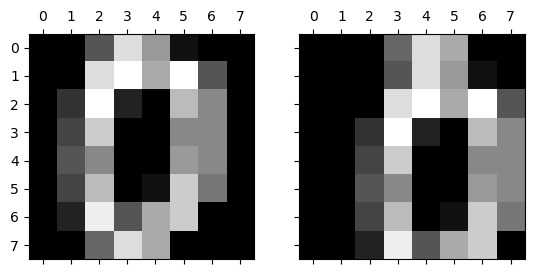

In [2]:
import numpy as np 
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# get image
image = load_digits()['data'][0].reshape(8, 8)

# shift image
shifted = np.roll(image, (1, 1), axis=(0, 1))

# Plot images
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.gray()
ax1.matshow(image)
ax2.matshow(shifted)
plt.show()

Her er de to bildene: originalet og den som er flyttet litt. 

In [3]:
df_image = pd.DataFrame(dict(original=image.flatten(), shifted=shifted.flatten())).T
df_image

,0,1,2,3,4,5,6,7,...,56,57,58,59,60,61,62,63
original,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
shifted,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,...,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0


Og her er hva som skjer i tabellen, der hver kolonne representerer en piksel. 

Den andre måten å analysere ustrukturerte data på er å bruke spesielt tilpassete metoder. Det er som oftest en bedre løsning fordi den ikke mister informasjon. Men denne løsningen er utenfor omfang av dette kurset. Derfor kommer vi i dette kurset til å se kun på strukturerte data. 

## Variabeltyper

Da er vi klare for å klassifisere strukturerte data. 

![structured_data](figures/structured.svg)

På den ene siden har vi numeriske data, som underdeles igjen i kontinuerlige og diskrete variabler. Kontinuerlige variabler er data som kan ta hvilken som helst verdi innen et gitt interval. Typiske eksempler av kontinuerlige variabler kan være høyde eller alder. Diskrete variabler er numeriske data som bare kan ha et utvalg av mulige verdier. For eksempel antall barn, eller mål i en fotballkamp. Det gir ingen mening å snakke om 1.3 barn, det er enten ett eller to. 
Denne skillelinjen er ikke så skarp som man kanskje skulle trodd. Hvis jeg måler høyde, så kan jeg kanskje bare måle det med en presisjon av 5 millimeter. I så fall er det bare en diskret antall verdier jeg faktisk kan ha i data. Men vi modellerer høyde likevel som kontinuerlig, fordi det gir mening å si at noen er 175,28 centimeter og høy selv om vi ikke kan måle det. 

På den andre siden har vi kategoriske variabler. Det er data som består av kategorier i stedet for tall. Typiske eksempler er kjønn, eller utdanningsnivå. Blant kategoriske variabler finnes det nominale og ordinale variabler. Nominale variabler er variabler der det ikke finnes noe rekkefølge av kategoriene. For eksempel kjønn eller yrke. 

Ordinale variabler er kategoriske variabler som har en opplagt rekkefølge i kategoriene. For eksempel hvis jeg lager en spørreundersøkelse om hvor godt forelesningsnotatene er likt blant studentene. I så fall er det kanskje svarkategoriene "veldig dårlig", "dårlig", "nøytral", "bra" eller "veldig bra". I så fall gir det mening å si at "veldig bra" er bedre enn "bra", som er bedre enn "nøytral" og så videre. 

Nå har vi hørt litt om forskjellige typer variabler. Men hvorfor bryr vi oss egentlig om dette? 

La oss si at vi har en undersøkelse som vurderer kundetilfredshet med svaralternativ "svært misfornøyd", "misfornøyd", "nøytral", "fornøyd" og "svært fornøyd". Dette er en ordinal variabel fordi det er en naturlig rekkefølge i svarkategoriene, men avstanden mellom dem er ikke nødvendigvis lik. Her er litt eksempeldata: 

| Kategori             | Frekvens |
|----------------------|----------|
| Svært misfornøyd (1) | 10       |
| Misfornøyd (2)       | 20       |
| Nøytral (3)          | 25       |
| Fornøyd (4)          | 30       |
| Svært fornøyd (5)    | 15       |


Hvis vi behandler denne ordinalvariabelen som en nominal kategorisk variabel, vil vi ignorere rekkefølgen. Hvis vi skal oppsummere variablen, så konkluderer vi kanskje at kategorien som ble svart mest (mode) er fornøyd (30% av svar).  

Hvis vi behandler denne ordinalvariabelen som en numerisk variabel, antar vi at avstanden mellom kategoriene er lik. Vi bruker altså for eksempel koden 1 for "svært misfornøyd", koden 2 for "misfornøyd", og så videre til koden 5 for svært fornøyd. For å oppsummere variablen vil vi kanskje ta gjennomsnittet (mean). Vi finner altså det er 

$$\text{mean}=\frac{(1⋅10)+(2⋅20)+(3⋅25)+(4⋅30)+(5⋅15)}{100}=3.2$$

Denne gjennomsnittsverdien gir oss et tall, men det gir ikke meningsfull informasjon om kundetilfredsheten, spesielt siden avstanden mellom kategoriene ikke er lik.

Når vi behandler variabelen som ordinal, tar vi hensyn til rekkefølgen, men ikke nødvendigvis avstanden mellom kategoriene. For eksempel kan vi bruke medianen i stedet for mean for å oppsummere kundetilfredshet. Medianen tar hensyn til rekkefølgen, men ikke avstanden mellom kategoriene.

Medianen er verdien som deler dataene i to like store deler. I vårt tilfelle, hvis vi sorterer dataene og finner vi at medianen er verdien ved den 50. observasjonen, som i dette tilfellet er "nøytral".

Nå har vi allerede sett på et eksempel av ordinale data. Hvis vi har nominale data i stedet, så gir det ikke mening si at en kategori er større eller mindre enn en annen. 

La oss ta et eksempel der vi har en dataset med informasjon om studenter og deres studieprogrammer.

| StudentID | Studieprogram |
|:---------:|:-------------:|
| abc123    | Informatikk   |
| def456    | Matematikk    |
| ghi789    | Fysikk        |
| nbl630    | Kjemi         |
| jbo006    | Biologi       |
| ppa040    | Matematikk    |
| fze128    | Informatikk   |
| nga042    | Kjemi         |

I dette tilfellet pleier vi å lage flere såkalte dummy-variabler ut av den kategoriske variablen. Vi bruker så mange variabler som det var kategorier og hver av disse nye kategorivariablene er 1 hvis radet er fra denne kategorien og 0 ellers. Her er hvordan datasetet ser ut etter dummy-koding:

| StudentID | Informatikk | Matematikk | Fysikk | Kjemi | Biologi |
|:---------:|-------------|------------|--------|-------|---------|
| abc123    | 1           | 0          | 0      | 0     | 0       |
| def456    | 0           | 1          | 0      | 0     | 0       |
| ghi789    | 0           | 0          | 1      | 0     | 0       |
| nbl630    | 0           | 0          | 0      | 1     | 0       |
| jbo006    | 0           | 0          | 0      | 0     | 1       |
| ppa040    | 0           | 1          | 0      | 0     | 0       |
| fze128    | 1           | 0          | 0      | 0     | 0       |
| nga042    | 0           | 0          | 0      | 1     | 0       |

Fordeler med dummy-variabler er at vi enkelt kan inkludere studieprogrammet i vår statistiske modell og få innsikt i hvordan for eksempel karakterer varierer mellom de forskjellige programmene. Dette lar oss også utføre hypotesetester for å se om det er forskjeller mellom studieprogrammene.

(sec:ryddig)=
## Ryddige data

Hva mener vi med ryddig data? Prinsippene for ryddig data er egentlig veldig enkle, men det er ofte verdifullt å tenke på de prinsippene. Vi kan spare mye tid hvis vi vet akkurat hvordan vi har lyst å sette opp data. I ryddige data har hver variabel sin egen kolonne og hver observasjon sin egen rad. Det finnes mange eksempler av uryddige data. I så fall må vi først lage data om til et ryddig format før vi kan analysere de. Her finnes det mange eksempler. 

Et eksempel der en kolonne inneholder flere variabler er følgende, der både karakter og antall poeng er i samme kolonnen. 

| StudentID |  Matematikk  |    Fysikk    |
|:---------:|:------------:|:------------:|
| abc123    | A (95 poeng) | B (85 poeng) |
| def456    | B (82 poeng) | D (68 poeng) |
| ghi789    | C (76 poeng) | A (92 poeng) |

En mer ryddig variant ville delt det opp: 

| StudentID | Matematikk-Karakter | Fysikk-Karakter | Matematikk-Poeng | Fysikk-Poeng |
|:---------:|:-------------------:|:---------------:|:----------------:|:------------:|
| abc123    | A                   | B               | 95               | 85           |
| def456    | B                   | D               | 82               | 68           |
| ghi789    | C                   | A               | 76               | 92           |



Det er kanskje mindre åpenbar hva det betyr at hver observasjon skal ha sin egen rad. Hva som er en observasjon avhenger av målet med analysen vår. 
Hvis vi prøver å predikere eksamenskarakteren til studenter i data science, så er følgende ryddige data: 

| StudentID | Alder | Studieprogram-Informatikk | Studieprogram-Statistikk | Karakter-Programmering | Karakter-Kalkulus |
|-----------|-------|---------------------------|--------------------------|------------------------|-------------------|
| abc123    | 24    | 1                         | 0                        | 3                      | 6                 |
| def456    | 21    | 0                         | 1                        | 5                      | 4                 |
| ghi789    | 32    | 1                         | 0                        | 5                      | 5                 |

Her prøver vi å predikere ut data science karakter per student, så vi vil ha en rad per student. I tillegg er hver kolonne en variabel som kan hjelpe oss med prediksjonen. 

Et eksempel av samme data på et uryddig format for spørsmålet vi prøver å svare på er følgende: 

| StudentID | Alder | Studieprogram | Fag           | Karakter |
|-----------|-------|---------------|---------------|----------|
| abc123    | 24    | Informatikk   | Programmering | 3        |
| def456    | 21    | Statistikk    | Programmering | 5        |
| ghi789    | 32    | Informatikk   | Programmering | 5        |
| abc123    | 24    | Informatikk   | Kalkulus      | 6        |
| def456    | 21    | Statistikk    | Kalkulus      | 4        |
| ghi789    | 32    | Informatikk   | Kalkulus      | 5        |

Det viser akkurat samme data, men her er det to rad per student. Sånn er ikke det enkelt å predikere én karakter per student. I underkapittel {ref}`sec:pandas` ser vi hvordan å omformatere data slikt. 

(sec:numpy)=
## Numpy

Denne delen handler om numpy-biblioteket, som vi bruker veldig ofte når vi jobber med data i python. Først er det viktig å huska at man ikke blir flink til å bruke numpy ved å lese om bruken av numpy. Den eneste måten man lærer å programmere er ved å faktisk programmere. 

Numpy er et bibliotek som brukes for å lage vektorer og matrisser. Her lager vi en vektor av som inneholder tall 1 og 2. 

In [4]:
vec = np.array([1, 2])

Hvis vi vil se på vektoren, så kan vi skrive den ut med `print`. 

In [5]:
print(vec)

[1 2]


Hvis vi vil sjekke hvor mange elementer vektoren inneholder, så kan vi spørre etter shape egenskapen som i det tilfelle gir oss at den har lengde 2. 

In [6]:
vec.shape

(2,)

Vi kan også lage matrisser. Her lager vi identitetsmatrissen i to dimensjoner. 

In [7]:
mat = np.eye(2)
print(mat)

[[1. 0.]
 [0. 1.]]


Når vi spør etter shape egenskapen får vi vite at matrissen har størrelsen 2 gang 2. 

In [8]:
mat.shape

(2, 2)

### Lage vektorer og matrisser

Det finnes mange måter å lage en numpy array. Her viser vi noen eksempler.

Numpy-funksjonen `arange` er det samme for numpy arrays som `range` er i standard python.

In [9]:
np.arange(5)

array([0, 1, 2, 3, 4])

Numpy-funksjonen `linspace` tillater at vi lager en array med fast start, slutt og en fast entall elementer som er jevnlig fordelt mellom starten og slutten.

In [10]:
np.linspace(start=2, stop=4, num=5)

array([2. , 2.5, 3. , 3.5, 4. ])

Vi kan bruke `ones` eller `zeros` for å lage en numpy array med bare enere eller bare nullere. 

In [11]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [12]:
np.zeros([2, 3])

array([[0., 0., 0.],
       [0., 0., 0.]])

Så finnes det også mange måter å lage tilfeldige tall på. Her er eksempler på hvordan å lage uniform og normal fordelte tall. Vi skall snakke om forskjellige fordelinger i {ref}`sec:sannsynlighet`. 

In [13]:
np.random.uniform(low=0, high=2, size=5)

array([0.88584774, 0.76976432, 0.36713409, 1.9401761 , 0.1961863 ])

In [14]:
np.random.normal(loc=0, scale=1, size=(2, 4))

array([[-0.75431072, -1.32588708, -1.35449161, -0.14305506],
       [ 0.41135839,  1.24574422,  0.51265912,  2.24111079]])

Data i numpy arrays kan ha forskjellige data type. Vi kan for eksempel lage integer, float eller boolean numpy arrays. Men hele numpy array har alltid samme data type. Her er noen eksempler på forskjellige datatyper: 

In [15]:
np.ones(4, dtype=int)

array([1, 1, 1, 1])

In [16]:
np.ones(4, dtype=float)

array([1., 1., 1., 1.])

In [17]:
np.ones(4, dtype=bool)

array([ True,  True,  True,  True])

In [18]:
np.ones(4, dtype=str)

array(['1', '1', '1', '1'], dtype='<U1')

### Regning i numpy

Vanligvis når vi regner med numpy arrays, så gjør vi elementvise regninger. Vi kan for eksempel addere to matrisser eller multiplisere en matrisse med et tall. 

In [19]:
mat = np.arange(1, 7).reshape(2, 3)
mat

array([[1, 2, 3],
       [4, 5, 6]])

In [20]:
mat + mat

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [21]:
2*mat + 1

array([[ 3,  5,  7],
       [ 9, 11, 13]])

Det finnes mange funksjoner som man kan bruke elementvis i numpy, for eksempel `sin`, `log`, `negative`:

In [22]:
np.sin(mat)

array([[ 0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ]])

In [23]:
np.log(mat)

array([[0.        , 0.69314718, 1.09861229],
       [1.38629436, 1.60943791, 1.79175947]])

In [24]:
np.negative(mat)

array([[-1, -2, -3],
       [-4, -5, -6]])

Det finnes også mange muligheter for å oppsummere matriser, for eksempel `max`, `mean`, og `sum`. 

In [25]:
np.max(mat)

6

In [26]:
np.mean(mat)

3.5

In [27]:
np.sum(mat)

21

Hvis vi vil multiplisere en matrisse med en vektor, så må vi være litt forsiktige. Her har vi lagd en identitetsmatrisse `mat` og en vektor `vec`.

In [28]:
mat = np.eye(2)
vec = np.array([1, 2])

For å regne ut multiplikasjonen må vi bruke dot-metoden. Da får vi som forventet ut den opprinnelige vektoren v.

In [29]:
mat.dot(vec)

array([1., 2.])

Hvis vi bare bruker mutliplikasjonstegnet, så gjør vi elementvis multiplikasjon. Når dimensjonene ikke er like, så gjør numpy en kolonnevise multiplikasjon. Den første kolonnen av identitetsmatrissen blir altså multiplisert med 1 og den andre kolonnen med 2. 

In [30]:
mat * vec

array([[1., 0.],
       [0., 2.]])

### Undermatrisser

Når vi har en matrisse, så vil vi ofte bare se på en del eller undermatrisse av den. Det kan vi gjøre ved å spessifisere et enkelt element. Her viser vi matrisen `A` i rad én og kolonne to. Husk at vi begynner å nummerere med 0. 

In [31]:
A = np.arange(12).reshape(3, 4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [32]:
A[1, 2]

6

Vi kan også se på en hel rad eller kolonne ved å bruke kollon-tegnet på den andre dimensjonen. 

In [33]:
A[1, :]

array([4, 5, 6, 7])

In [34]:
A[:, 1]

array([1, 5, 9])

Vi kan også angi lister for rad og kolonner og kan bruke en forkortet notasjon i kollon j, som tar med alle radene eller kolonnene fra og inkludert i til men ekskludert j. 

In [35]:
A[[0, 2], :]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [36]:
A[:, 1:3]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

### Kombinere data

For å kombinere data, dan vi bruke `hstack` og `vstack` funksjonene. `hstack` setter data sammen horisontalt, fungerer altså kun hvis de to numpy arrays vi vil kombinere har samme antall rad. `vstack` setter data sammen vertikalt, fungerer altså hvis de to numpy arrays vi vil kombinere har samme antall kolonner. 

In [37]:
A = np.eye(4)
B = np.ones([3, 4])
C = np.zeros([4, 2])

In [38]:
np.hstack((A, C))

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [39]:
np.vstack((A, B))

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

(sec:pandas)=
## Pandas

For å jobbe med tabulære data er det praktisk å bruke pandas. 

In [40]:
import pandas as pd

### Lese og beskrive data

Vi begynner ved å lese inn data. Her bruker vi pandas sin `read_csv`-funksjonen. Det er kanskje den mest brukte måten å lese inn data. Men det finnes veldig mange forskjellige typer filer og for de fleste typer finnes det en pandas funksjon for å lese de inn, se i [dokumentasjonen](https://pandas.pydata.org/pandas-docs/stable/reference/io.html). Avhengig av hvordan data ser ut, så må vi også velge ut hvilke rad og kolonner vi vil lese inn, angi hvilke verdier som skal ansees som manglende verider, hva slags kodering tekstdata har, og mange andre egenskaper av data. Alt dette er mulig med de riktige argumentene til `read_csv`-funksjonen. 

In [41]:
df = pd.read_csv('data/informatikkemner_uib.csv')

Her leste vi inn data om alle informatikkemner ved Universitetet i Bergen (tilstand 9. august 2024). La oss se litt på det datasettet.

In [42]:
df.shape

(101, 6)

Først ser vi igjen på shape. Datasettet har atlså 101 rad og 6 kolonner. 

La oss se litt på de første radene ved hjelp av head-metoden. Det er ofte nyttig for å få et inntrykk av data.

In [43]:
df.head()

,emnekode,tittel,semester,nivå,studiepoeng,vurdering
0,BINF100,Grunnleggande bioinformatikk,Vår,Lågaregradsemne,10.0,Skriftleg skuleeksamen
1,BINF200,Analyse av biologiske sekvensar og strukturar,Haust,Lågaregradsemne,10.0,Mappevurdering
2,BINF201,Innføring i omics,Haust,Lågaregradsemne,10.0,Mappevurdering
3,BINF301,Genom-skala algoritmar,Vår,Masteremne,10.0,Skriftleg skuleeksamen
4,BINF305,Systembiologi,Haust,Masteremne,10.0,Mappevurdering


Her ser vi at det er informasjon om emnekode, tittel, hvilket semester det blir undervist i, hvilket nivå emnet er, hvor mange studiepoeng studentene for ved bestått emne og vurderingsformen. 

Så skal vi finne ut av hva slags data hver variabel inneholder. I motsettning til `numpy`, så kan `pandas` inneholde flere datatyper. Men hver kolonne består av bare én datatype. Egenskapen `dtypes` gir oss informasjon om data er integer, float eller noe annet. For tekstdata står det `object`. 

In [44]:
df.dtypes

emnekode        object
tittel          object
semester        object
nivå            object
studiepoeng    float64
vurdering       object
dtype: object

Vi kan bruke describe-metoden for å få litt statistikk om de data vi har lest inn. Her for vi antall målinger, gjennomsnitt, standardavvik, minimum, 25%-kvantil, median, 75%-kvantil og maksimum. Vi går gjennom de begrepene i kapitel {ref}`sec:statistikk`. 

In [45]:
df.describe()

,studiepoeng
count,101.000000
mean,10.153465
std,6.307037
min,0.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,60.000000


Men her ser vi bare på numeriske data. Vi kan også bruke describe-metoden for å se på kategoriske data, men i så fall må vi bruke opsjonen `include=object`. Da får vi selvfølgelig litt forskjellige informasjon fordi mange av de statistikkene ikke ville gitt mening. Vi får opp antall observasjoner, antall observasjoner som er forskjellige fra hverandre, den mest vanlige observasjonen og hvor vanlig den er. 

In [46]:
df.describe(include=object)

,emnekode,tittel,semester,nivå,vurdering
count,101,101,101,101,77
unique,101,85,4,3,14
top,BINF100,Videregåande emner/seminar i kryptografi,Vår,Masteremne,Skriftleg skuleeksamen
freq,1,3,35,60,30


En annen viktig ting å se på er hvor mye av data som mangler. Vi kan i utgangspunktet se det delvis på count i describe, men det er greit å rege det ut direkte. 

In [47]:
df.isnull().sum()

emnekode        0
tittel          0
semester        0
nivå            0
studiepoeng     0
vurdering      24
dtype: int64

### Undermengder av data

Samme som i numpy array vil vi ofte se på undermengder av data. Her bruker vi `.loc` metoden. 

Vi kan velge ut kolonner ved å angi kolonnenavn. 

In [48]:
df.loc[:, ['tittel', 'studiepoeng']]

,tittel,studiepoeng
0,Grunnleggande bioinformatikk,10.0
1,Analyse av biologiske sekvensar og strukturar,10.0
2,Innføring i omics,10.0
3,Genom-skala algoritmar,10.0
4,Systembiologi,10.0
...,...,...
96,Metaheuristikkar,10.0
97,Metodar for analyse av forsyningskjeder,10.0
98,Diskrete strukturar,10.0
99,Geometrisk djup læring,3.0


Vi kan da spesifisere rad på samme måten. 

In [49]:
df.loc[[20, 40, 60], :]

,emnekode,tittel,semester,nivå,studiepoeng,vurdering
20,INF112,Innføring i systemutvikling,Vår,Lågaregradsemne,10.0,Skriftleg eksamen
40,INF234,Algoritmer,Haust,Masteremne,10.0,Skriftleg skuleeksamen
60,INF272,Ikkje-lineær optimering,"Haust, Vår",Masteremne,10.0,NaN


Men det er kanskje mer nyttig å angi en betingelse for radene. La oss for eksempel velge ut alle fag med tittel som starter på "Innføring".  

In [50]:
df.loc[df.loc[:, 'tittel'].str.startswith('Innføring'), :]

,emnekode,tittel,semester,nivå,studiepoeng,vurdering
2,BINF201,Innføring i omics,Haust,Lågaregradsemne,10.0,Mappevurdering
17,INF100,Innføring i programmering,"Haust, Vår",Lågaregradsemne,10.0,Skriftleg skuleeksamen (Ny eksamen)
20,INF112,Innføring i systemutvikling,Vår,Lågaregradsemne,10.0,Skriftleg eksamen
21,INF113,Innføring i operativsystem,Haust,Lågaregradsemne,10.0,Mappevurdering
27,INF161,Innføring i data science,Haust,Lågaregradsemne,10.0,Mappevurdering
37,INF225,Innføring i programomsetjing,Haust,Masteremne,10.0,Munnleg eksamen
39,INF227,Innføring i logikk,Vår,Masteremne,10.0,Skriftleg skuleeksamen
50,INF247,Innføring i kryptoanalyse av symmetriske chiffer,Vår,Masteremne,10.0,Skriftleg skuleeksamen
56,INF264,Innføring i maskinlæring,Haust,Masteremne,10.0,Mappevurdering
85,INF620,Innføring i programmering modul 1,"Haust, Vår",Lågaregradsemne,5.0,NaN


Legg merke til at vi først lager en boolsk variabel og så bruker vi den til å indeksere. Her ser vi først på dette mellomsteget. 

In [51]:
inforings_emner = df.loc[:, 'tittel'].str.startswith('Innføring')
inforings_emner

0      False
1      False
2       True
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Name: tittel, Length: 101, dtype: bool

Så kan vi enkelt bruke denne boolsken variabelen til å indeksere datasettet vårt. 

In [52]:
df.loc[inforings_emner, :]

,emnekode,tittel,semester,nivå,studiepoeng,vurdering
2,BINF201,Innføring i omics,Haust,Lågaregradsemne,10.0,Mappevurdering
17,INF100,Innføring i programmering,"Haust, Vår",Lågaregradsemne,10.0,Skriftleg skuleeksamen (Ny eksamen)
20,INF112,Innføring i systemutvikling,Vår,Lågaregradsemne,10.0,Skriftleg eksamen
21,INF113,Innføring i operativsystem,Haust,Lågaregradsemne,10.0,Mappevurdering
27,INF161,Innføring i data science,Haust,Lågaregradsemne,10.0,Mappevurdering
37,INF225,Innføring i programomsetjing,Haust,Masteremne,10.0,Munnleg eksamen
39,INF227,Innføring i logikk,Vår,Masteremne,10.0,Skriftleg skuleeksamen
50,INF247,Innføring i kryptoanalyse av symmetriske chiffer,Vår,Masteremne,10.0,Skriftleg skuleeksamen
56,INF264,Innføring i maskinlæring,Haust,Masteremne,10.0,Mappevurdering
85,INF620,Innføring i programmering modul 1,"Haust, Vår",Lågaregradsemne,5.0,NaN


### Databeskrivelse med pandas 

Typiske ting vi kan gjøre med pandas er å se på beskrivende statistikk, som `mean`, `max` for numeriske variabler. 

In [53]:
df.loc[:, 'studiepoeng'].mean()

10.153465346534654

In [54]:
df.loc[:, 'studiepoeng'].max()

60.0

Vi kan også for eksempel se på antall forskjellige verdier. 

In [55]:
df.nunique()

emnekode       101
tittel          85
semester         4
nivå             3
studiepoeng      8
vurdering       14
dtype: int64

For enkle variabler er det også nyttig å se på antall ganger hver verdi forekommer.

In [56]:
df.loc[:, 'studiepoeng'].value_counts()

studiepoeng
10.0    84
5.0      6
2.5      5
30.0     2
20.0     1
60.0     1
3.0      1
0.0      1
Name: count, dtype: int64

Ofte er det også nyttig å gruppere etter en variabel og gjøre utregninger per gruppe. Her ser vi for eksempel på hvor mange unique verdier det er for alle variabler avhengig av semesteret. 

In [57]:
df.groupby("semester").nunique()

,emnekode,tittel,nivå,studiepoeng,vurdering
semester,,,,,
Haust,31,30,3,2,4
"Haust, Vår",31,25,3,6,9
Uvisst,4,3,2,3,0
Vår,35,31,3,4,6


### Kombinere data

Først trenger vi et datasett som kan kombineres med dataene vi har. Vi kan også lage data frames selv. Den vanligste måten er ved bruk av pandas DataFrame init-metoden og en dictionary som inneholder kolonnene. La oss lage et dataframes som inneholder noen av undervisere for høst 2024. 

In [58]:
df_undervisere_2024 = pd.DataFrame(dict(emne=['INF161', 'INF264', 'AIKI100'], undervisere=['Blaser', 'Malde', 'Pedersen'])) 
df_undervisere_2024 

,emne,undervisere
0,INF161,Blaser
1,INF264,Malde
2,AIKI100,Pedersen


Nå skal vi kombinere de to dataset. Først må vi sette den kolonnen som skal være lik som indeks-kolonnen. Det gjør at vi kan nå bruke id direkte for å få data rad med denne id-en. 

In [59]:
df_undervisere_2024.set_index('emne', inplace=True)
df.set_index('emnekode', inplace=True)

Nå er vi klar til å kombinere data. 

For å kombinere data må vi først spesifisere de to dataset. Så må vi angi hva å gjøre når de to datasett ikke inneholder de samme studentene. Ved bruk av 'right', så får vi med alle emner der vi har informasjon om undervisere. 

In [60]:
df.join(df_undervisere_2024, how='right')

,tittel,semester,nivå,studiepoeng,vurdering,undervisere
emne,,,,,,
INF161,Innføring i data science,Haust,Lågaregradsemne,10.0,Mappevurdering,Blaser
INF264,Innføring i maskinlæring,Haust,Masteremne,10.0,Mappevurdering,Malde
AIKI100,NaN,NaN,NaN,NaN,NaN,Pedersen


Hvis vi bruker 'inner' i stedet, så får vi bare informasjon om de radene som er med i begge datasett. 

In [61]:
df.join(df_undervisere_2024, how='inner')

,tittel,semester,nivå,studiepoeng,vurdering,undervisere
INF161,Innføring i data science,Haust,Lågaregradsemne,10.0,Mappevurdering,Blaser
INF264,Innføring i maskinlæring,Haust,Masteremne,10.0,Mappevurdering,Malde


Vi kan også bruke 'outer' og 'left'. Se selv hva som skjer i så fall. Hvilken av de typene joins (altså 'left', 'right', 'inner', eller 'outer') vi skal bruke avhenger av hva vi vil ha som radene - husk vår diskusjon om {ref}`sec:ryddig`. 

### Reformatere data

Nå kommer det noen funksjoner som kan være praktisk for å reformatere data på en ryddig måte. Her lager vi eksemplet av uryddig data fra Seksjon {ref}`sec:ryddig`. 

In [62]:
df_uryddig = pd.DataFrame(dict(StudentID=['abc123', 'def456', 'ghi789'], 
                               Matematikk=['A (95 poeng)', 'B (82 poeng)', 'C (76 poeng)'], 
                               Fysikk=['B (85 poeng)', 'D (68 poeng)', 'A (92 poeng)']))
df_uryddig

,StudentID,Matematikk,Fysikk
0,abc123,A (95 poeng),B (85 poeng)
1,def456,B (82 poeng),D (68 poeng)
2,ghi789,C (76 poeng),A (92 poeng)


I dette eksempelet trenger vi igjen `str`-funksjonen for å jobbe med tekst. 

In [63]:
df_ryddig = df_uryddig.copy()
df_ryddig[['Matematikk-Karakter', 'Matematikk-Poeng']] = df_ryddig['Matematikk'].str.extract(r'([A-F]) \((\d+) poeng\)')
df_ryddig[['Fysikk-Karakter', 'Fysikk-Poeng']] = df_ryddig['Fysikk'].str.extract(r'([A-F]) \((\d+) poeng\)')
df_ryddig = df_ryddig.loc[:, ['StudentID', 'Matematikk-Karakter', 'Fysikk-Karakter', 'Matematikk-Poeng', 'Fysikk-Poeng']]
df_ryddig

,StudentID,Matematikk-Karakter,Fysikk-Karakter,Matematikk-Poeng,Fysikk-Poeng
0,abc123,A,B,95,85
1,def456,B,D,82,68
2,ghi789,C,A,76,92


Her endret vi kun på kolonnene, men radene har fortsatt samme betydning som før. I det neste eksempelet bytter vi på betydning av radene også. Her lager vi først datasettet. 

In [64]:
df_original = pd.DataFrame({
    'StudentID': ['abc123', 'def456', 'ghi789'],
    'Alder': [24, 21, 32],
    'Studieprogram-Informatikk': [1, 0, 1],
    'Studieprogram-Statistikk': [0, 1, 0],
    'Karakter-Programmering': [3, 5, 5], 
    'Karakter-Kalkulus': [6, 4, 5]})
df_original

,StudentID,Alder,Studieprogram-Informatikk,Studieprogram-Statistikk,Karakter-Programmering,Karakter-Kalkulus
0,abc123,24,1,0,3,6
1,def456,21,0,1,5,4
2,ghi789,32,1,0,5,5


Som første steg fjerner vi dummy-kolonnene for studieprogramet. 

In [65]:
df = df_original.copy()
dummie_columns = ['Studieprogram-Informatikk', 'Studieprogram-Statistikk']
studieprogram_df = pd.from_dummies(df.loc[:, dummie_columns], sep='-')
df = pd.concat([df.drop(dummie_columns, axis=1), studieprogram_df], axis=1)
df

,StudentID,Alder,Karakter-Programmering,Karakter-Kalkulus,Studieprogram
0,abc123,24,3,6,Informatikk
1,def456,21,5,4,Statistikk
2,ghi789,32,5,5,Informatikk


Så lager vi en ny datasett, som inneholder en rad per karakter. Vi må angi hvilke kolonnene som skal til sammen identifisere en rad (`id_vars`) og hva den nye variablen (`var_name`) og verdien (`value_name`) skal hete. 

In [66]:
df_melted = pd.melt(df, id_vars=['StudentID', 'Alder', 'Studieprogram'], var_name='Fag', value_name='Karakter')
df_melted

,StudentID,Alder,Studieprogram,Fag,Karakter
0,abc123,24,Informatikk,Karakter-Programmering,3
1,def456,21,Statistikk,Karakter-Programmering,5
2,ghi789,32,Informatikk,Karakter-Programmering,5
3,abc123,24,Informatikk,Karakter-Kalkulus,6
4,def456,21,Statistikk,Karakter-Kalkulus,4
5,ghi789,32,Informatikk,Karakter-Kalkulus,5


Til slutt kan vi fjerne 'Karakter-' fra faget. 

In [67]:
df_melted.loc[:, 'Fag'] = df_melted.loc[:, 'Fag'].str.split('-', n=1).str.get(1)
df_melted

,StudentID,Alder,Studieprogram,Fag,Karakter
0,abc123,24,Informatikk,Programmering,3
1,def456,21,Statistikk,Programmering,5
2,ghi789,32,Informatikk,Programmering,5
3,abc123,24,Informatikk,Kalkulus,6
4,def456,21,Statistikk,Kalkulus,4
5,ghi789,32,Informatikk,Kalkulus,5


Nå har vi omformattert datasettet til et annet format. Kan vi komme tilbake igjen?

Her bruker vi akkurat de samme stegene men maklengs. Først legger vi til 'Karakter-' til faget igjen. 

In [68]:
df_melted.loc[:, 'Fag'] = 'Karakter-' + df_melted.loc[:, 'Fag']
df_melted

,StudentID,Alder,Studieprogram,Fag,Karakter
0,abc123,24,Informatikk,Karakter-Programmering,3
1,def456,21,Statistikk,Karakter-Programmering,5
2,ghi789,32,Informatikk,Karakter-Programmering,5
3,abc123,24,Informatikk,Karakter-Kalkulus,6
4,def456,21,Statistikk,Karakter-Kalkulus,4
5,ghi789,32,Informatikk,Karakter-Kalkulus,5


Så bruker vi funksjonen `pivot` til å lage flere kolonner ut av en kolonne. Legg merke til at det som var `id_vars` for `melt`-funksjonen blir til `index` nå. Det som var `var_name` blir til `columns` og det som var `value_name` ble til `values`. Her ser godt at `pivot` og `melt` er inverse funkjsoner. 

In [69]:
df_pivoted = df_melted.pivot(index=['StudentID', 'Alder', 'Studieprogram'], columns='Fag', values='Karakter').reset_index()
df_pivoted

Fag,StudentID,Alder,Studieprogram,Karakter-Kalkulus,Karakter-Programmering
0,abc123,24,Informatikk,6,3
1,def456,21,Statistikk,4,5
2,ghi789,32,Informatikk,5,5


Til slutt må vi også lage dummie-variablene igjen. 

In [70]:
df_tilbake = pd.get_dummies(df_pivoted, columns=['Studieprogram'], dtype=int, prefix_sep='-')
df_tilbake

,StudentID,Alder,Karakter-Kalkulus,Karakter-Programmering,Studieprogram-Informatikk,Studieprogram-Statistikk
0,abc123,24,6,3,1,0
1,def456,21,4,5,0,1
2,ghi789,32,5,5,1,0


Nå har vi de samme data som vi begynte med. Vi kan sjkke det ved gjelp av `equals`-funksjonen. Siden kolonne-rekkefølgen har forandret seg bruker vi `sort_index` på begge dataframes. 

In [71]:
df_original.sort_index(axis=1).equals(df_tilbake.sort_index(axis=1))

True